In [2]:
import math
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

b = 2
c = 1


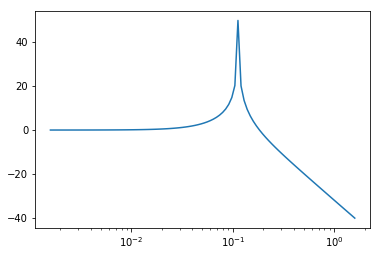

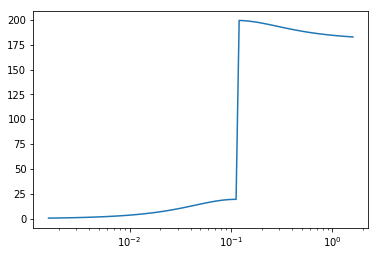

In [3]:

test_RC = signal.lti([b, 1], [b*c, b, c, 1])
W, mag, phase = signal.bode(test_RC)
fs = [0.5 * w / math.pi for w in W]



plt.figure()
plt.semilogx(fs, mag)
plt.figure()
plt.semilogx(fs, phase)
plt.show()

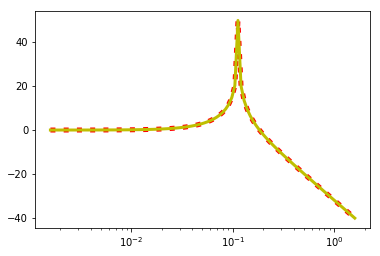

In [4]:
def A(w):
    if not np.isclose(1 - b * w**2,0):
        return np.abs(1/(1 - b * w**2)) * 1/(1 + c**2 * w**2) * np.sqrt(1 + b**2 * w**2) * np.sqrt(1 + c**2 * w**2)
    else:
        return 1

freq_response = [A(w) for w in W]
plt.figure()
plt.plot(fs, 20 * np.log10(freq_response), 'r:', linewidth = 5)
plt.semilogx(fs, mag, 'y',linewidth = 3)
plt.show()

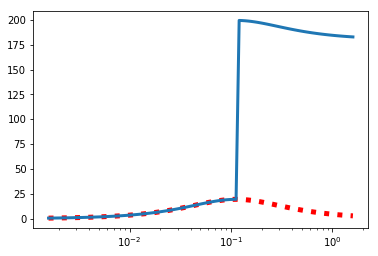

In [5]:
def F(w):
    return math.atan2(((b - c) * w),(1 + c * b * w**2))

phase_response = [F(w) * 180 / math.pi  for w in W]
plt.figure()
plt.semilogx(fs, phase_response, 'r:', linewidth = 5)
plt.semilogx(fs, phase, linewidth = 3)
plt.show()

frequency: 0.012909548121441445


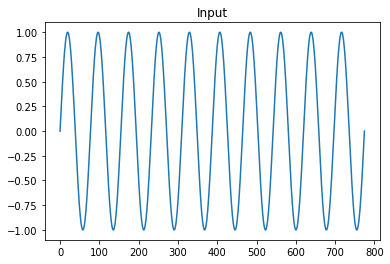

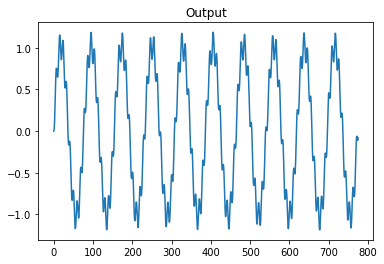

frequency: 0.10471332492864246


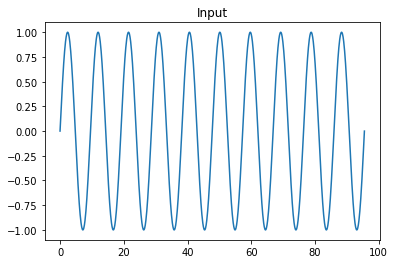

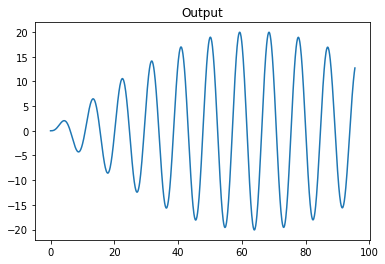

frequency: 0.8493620624412024


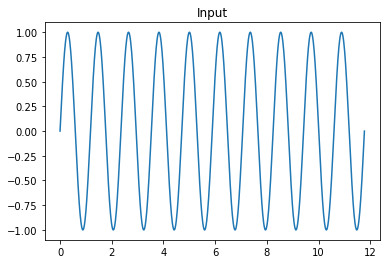

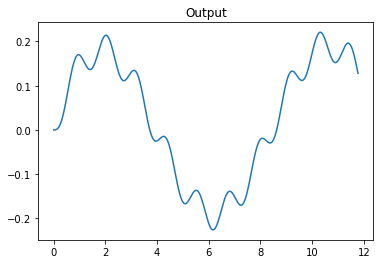

In [9]:
# подаем синусоидальный сигнал при переменной частоте
for freq in fs[30], fs[60], fs[90]:
    print("frequency:", freq)
    # создадим последовательность моментов времени, в которых будет вычислен сигнал, так, чтобы длительность исследуемого отрезка соответствовала, например, 10 периодам 
    T = np.linspace(0, 10.0/freq, 1001) 
    # создадим сигнал в виде синусоиды заданной частоты 
    S = [math.sin(t*2*math.pi*freq) for t in T] 
    # пропустим его через систему 
    Tout, yout, xout = signal.lsim(test_RC, S, T) 
    # выведем входной и выходной сигналы 
    plt.figure() 
    plt.title('Input')
    plt.plot(T, S) 
    plt.figure()
    plt.title('Output')
    plt.plot(Tout, yout) 
    plt.show()

frequency: 0.10471332492864246
magnitude: 0.5


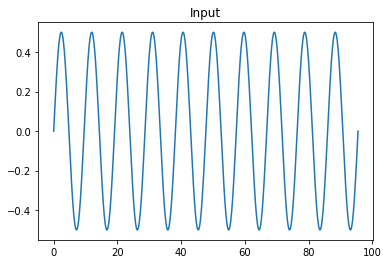

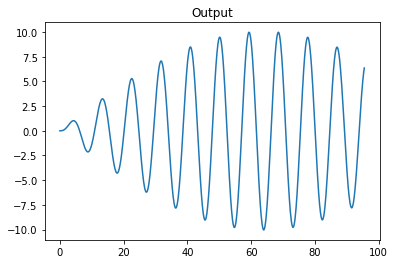

frequency: 0.10471332492864246
magnitude: 1


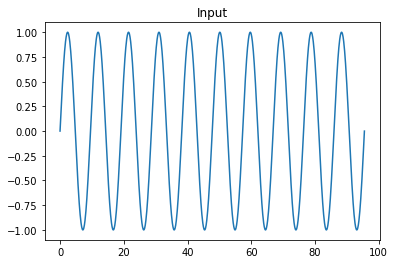

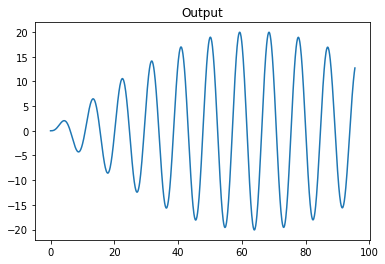

frequency: 0.10471332492864246
magnitude: 2


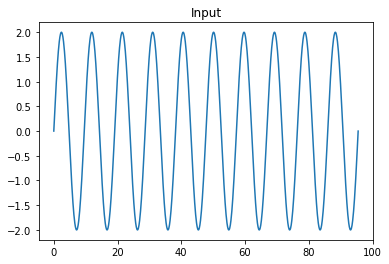

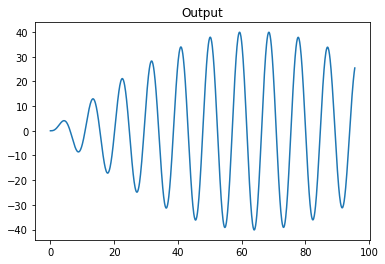

frequency: 0.10471332492864246
magnitude: 10


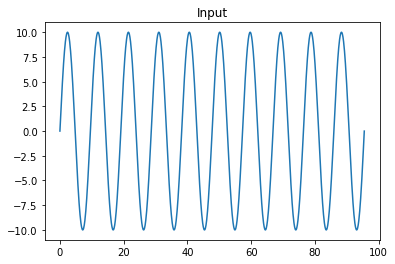

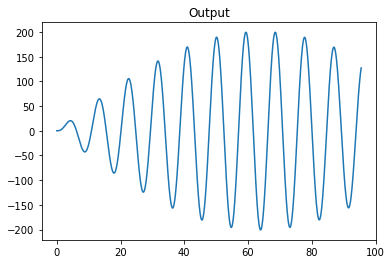

In [12]:
# переменная амплитуда, частота фиксирована
for magnitude in 0.5, 1, 2, 10:
    freq = fs[60]
    print("frequency:", freq)
    T = np.linspace(0, 10.0/freq, 1001) 
    print("magnitude:", magnitude)
    S = [magnitude * math.sin(t*2*math.pi*freq) for t in T]  
    Tout, yout, xout = signal.lsim(test_RC, S, T)  
    plt.figure() 
    plt.plot(T, S) 
    plt.title('Input')
    plt.figure() 
    plt.title('Output')
    plt.plot(Tout, yout) 
    plt.show()

In [13]:
# переходная функция
def h(t):
    return 1/(np.square(c) + b)*(c * (b - c) * (np.exp(-t/c) - 1) - 2 * np.sqrt(b) * (1 + c) * (np.cos(t/np.sqrt(b)) - 1))


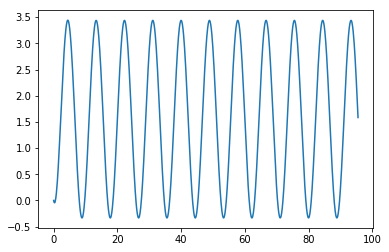

In [14]:
plt.plot(T, h(T))
plt.show()

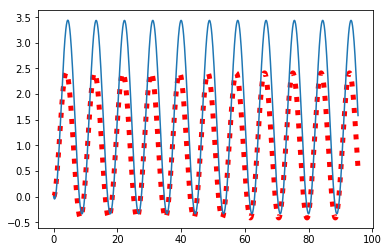

In [15]:
S = np.heaviside(T, 1)
Tout, yout, xout = signal.lsim(test_RC, S, T)
plt.figure()
plt.plot(Tout, yout, "r:", linewidth = 5) #выходной сигнал
plt.plot(T, h(T))
plt.show()